# Lab 4 (30-01-2024)

This lab experiments help you master how to do linear regression and multiple linear regression.

We will be using real estate database provided in lab2.



In [1]:
Registration_Number = "22011103010"
Name = "Deepthi"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Deepthi and my roll no : 22011103010
Computer IP Address is: 192.168.29.104


## Experiment 1 - Predicting House prise using the area of the house using Linear regression
Load real estate dataset
 Split the dataset into

1.  Split the dataset into train (90%) and test (10%) using scikit learn
2.  Fill the cost function
3.  Fill the liner regression fit function
4.  Fill the routine for Gradient descent





In [2]:
# split the dataset into test and train
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True,scaled=True)
dataset_dia = diabetes.data

X = dataset_dia['age'].to_numpy()
y = diabetes.target.to_numpy()

diabetes

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

In [3]:
# Experiment 1 - Linear regression with one variable
# Fill following functions
# Linear regression one variable
def cost_function(weight,bias,X,y):
  J = 0.0
  n = len(y)
  for i in range(0,n):
    J += (weight*X[i]+bias-y[i])**2
  J /= (2*n)
  return J

def get_gradients(weight,bias,X,y):
  dJ_dw = 0.0
  dJ_db = 0.0
  n = len(y)
  for i in range(0,n):
    dJ_dw += (weight*X[i] + bias -y[i])*X[i]
    dJ_db += weight*X[i]+bias-y[i]
  dJ_dw /= (n)
  dJ_db /= (n)
  return dJ_dw, dJ_db

def gradient_descent(X, y, weight=1.0, bias=1.0, learning_rate=0.9,threshold=0.1):
  isConverged = False
  weight_ = weight
  bias_ = bias
  iter_count = 0
  while(not isConverged):
    iter_count += 1
    dw, db = get_gradients(weight_,bias_,X,y)
    weight_ -= learning_rate*dw
    bias_ -= learning_rate*db
    if(abs(learning_rate*dw)<threshold and abs(learning_rate*db)<threshold):
      isConverged = True
    # print(weight_, bias_)
    weight = weight_
    bias = bias_
  print("Converged in " , iter_count,  "iterations...")
  return weight_, bias_



Converged in  895 iterations...


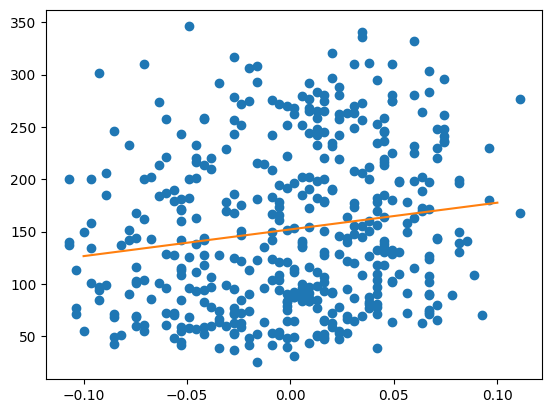

In [4]:
w,b = gradient_descent(X,y)

import matplotlib.pyplot as plt

plt.plot(X, y, 'o')
zx = np.linspace(-0.1, 0.1, 100)
zy = w*zx + b
plt.plot(zx,zy)
plt.show()

# Experminent 2 - Multiple linear regression
use more features and modify the code for more than 1 features

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(as_frame=True, scaled=True)
dataset_dia = diabetes.data

X = dataset_dia[['age', 'bmi']].to_numpy()
y = diabetes.target.to_numpy()

In [6]:
def cost_function(weight, bias, X, y):
    J = 0.0
    n = len(y)
    for i in range(0, n):
        J += (np.dot(weight, X[i]) + bias - y[i]) ** 2
    J /= (2 * n)
    return J

def get_gradients(weight, bias, X, y):
    dJ_dw = np.zeros_like(weight)
    dJ_db = 0.0
    n = len(y)
    for i in range(0, n):
        dJ_dw += (np.dot(weight, X[i]) + bias - y[i]) * X[i]
        dJ_db += np.dot(weight, X[i]) + bias - y[i]
    dJ_dw /= n
    dJ_db /= n
    return dJ_dw, dJ_db

def gradient_descent(X, y, weight=None, bias=None, learning_rate=0.9, threshold=0.1):
    if weight is None:
        weight = np.ones(X.shape[1])
    if bias is None:
        bias = 1.0
    isConverged = False
    weight_ = weight
    bias_ = bias
    iter_count = 0
    while not isConverged:
        iter_count += 1
        dw, db = get_gradients(weight_, bias_, X, y)
        weight_ -= learning_rate * dw
        bias_ -= learning_rate * db
        if np.all(abs(learning_rate * dw) < threshold) and abs(learning_rate * db) < threshold:
            isConverged = True
    print("Converged in", iter_count, "iterations...")
    return weight_, bias_

Converged in 1438 iterations...


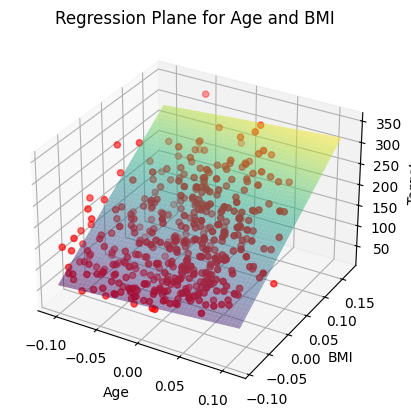

In [7]:
# Perform gradient descent
w, b = gradient_descent(X, y)

# Creating meshgrid for age and bmi
age_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
bmi_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
age_mesh, bmi_mesh = np.meshgrid(age_range, bmi_range)

# Predicting target variable for each point on meshgrid
predictions = w[0] * age_mesh + w[1] * bmi_mesh + b

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o', label='Data Points')
ax.plot_surface(age_mesh, bmi_mesh, predictions, alpha=0.5, cmap='viridis', label='Regression Plane')
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Target')
ax.set_title('Regression Plane for Age and BMI')
plt.show()

# Experiment 3 - Polynomial Linear Regression

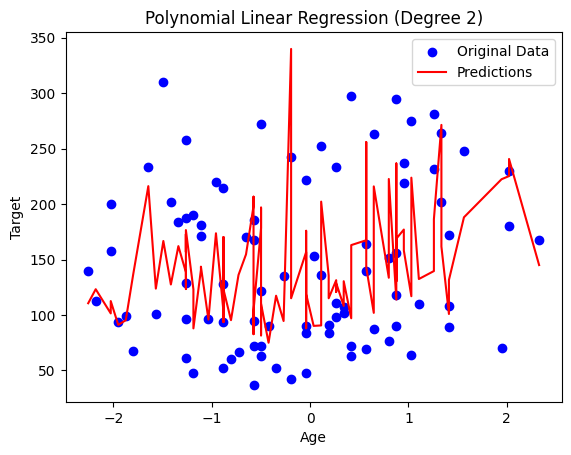

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()
X = dataset_dia[['age', 'bmi','s1']].to_numpy()
y = diabetes.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to add polynomial features
def add_polynomial_features(X, degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly_features.fit_transform(X)
    return X_poly

# Cost function for polynomial regression
def cost_function(weight, bias, X_poly, y):
    """
    Calculates the mean squared error for polynomial regression.
    """
    n = len(y)
    predictions = np.dot(X_poly, weight) + bias
    J = np.sum((predictions - y) ** 2) / (2 * n)
    return J

# Gradients for polynomial regression
def get_gradients(weight, bias, X_poly, y):
    """
    Calculates the gradients of the cost function for polynomial regression.
    """
    n = len(y)
    predictions = np.dot(X_poly, weight) + bias
    error = predictions - y
    dJ_dw = np.dot(X_poly.T, error) / n
    dJ_db = np.sum(error) / n
    return dJ_dw, dJ_db

# Manual implementation of gradient descent
def gradient_descent(X_poly, y, weight, bias, learning_rate=0.01, num_iterations=1000, threshold=0.0001):
    """
    Performs gradient descent to train the polynomial regression model.
    """
    for _ in range(num_iterations):
        dJ_dw, dJ_db = get_gradients(weight, bias, X_poly, y)
        weight -= learning_rate * dJ_dw
        bias -= learning_rate * dJ_db
        if np.max(np.abs(learning_rate * dJ_dw)) < threshold and np.abs(learning_rate * dJ_db) < threshold:
            break
    return weight, bias

# Experiment - Perform polynomial linear regression with degree 2
degree = 2
x_train_trans = add_polynomial_features(x_train, degree)
x_test_trans = add_polynomial_features(x_test, degree)

# Initialize weights and bias
weight = np.random.randn(x_train_trans.shape[1])
bias = np.random.randn(1)

# Train the model using gradient descent
weight, bias = gradient_descent(x_train_trans, y_train, weight, bias)

# Make predictions on the test set
y_pred = np.dot(x_test_trans, weight) + bias

# Visualize the predictions
plt.scatter(x_test[:, 0], y_test, color='blue', label='Original Data')
sorted_indices = np.argsort(x_test[:, 0])
plt.plot(x_test[sorted_indices, 0], y_pred[sorted_indices], color='red', label='Predictions')
plt.xlabel('Age')
plt.ylabel('Target')
plt.legend()
plt.title('Polynomial Linear Regression (Degree {})'.format(degree))
plt.show()
